<a href="https://colab.research.google.com/github/Md-jaber-hossain/Deep-learning-based-approach-for-recognition-and-classification-of-papaya-leaf-diseases/blob/main/The_Code_of_ResNet50_Model_of_CNN_Algorithm_for_Papaya_Leaf_Diseases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import the libraries
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, GlobalAveragePooling2D # GlobalAveragePooling2D my edit
from tensorflow.keras.models import Model
import keras.applications.resnet
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
#from tensorflow.keras.optimizers import Adam
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import pandas as pd
import seaborn as sn
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Re-size all the images
IMAGE_SIZE = [224, 224]

In [ ]:
train_path = '/content/drive/MyDrive/papaya-leaf-disease-dataset/train'
test_path = '/content/drive/MyDrive/papaya-leaf-disease-dataset/test'
valid_path = '/content/drive/MyDrive/papaya-leaf-disease-dataset/validation'

print ('train class size: ', len(train_path))
print ('test class size: ', len(test_path))
print ('valid class size: ', len(valid_path))

train class size:  56
test class size:  55
valid class size:  61


In [ ]:
# Number of output classes
folders = glob('/content/drive/MyDrive/papaya-leaf-disease-dataset/train/*')
print ('total class: ', len(folders))

total class:  5


In [ ]:
# Import the Vgg 16 library

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

x = resnet.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
for layer in resnet.layers:
    layer.trainable = False

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

In [ ]:
# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [ ]:
# View the structure of the ResNet50 model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Using the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(shear_range = 0.2,
                                   rescale = 1./255,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   validation_split = 0.4 )

In [ ]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5503 images belonging to 5 classes.


In [ ]:
valid_set = train_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 651 images belonging to 5 classes.


In [ ]:
test_set = train_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 1,
                                            class_mode = 'categorical')

Found 350 images belonging to 5 classes.


In [ ]:
x,y = test_set.next()
x.shape

(1, 224, 224, 3)

In [ ]:
# Fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(valid_set)
)

<ipython-input-17-ea6b0d305adc>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/20
172/172 [==============================] - 1397s 8s/step - loss: 1.4547 - accuracy: 0.3938 - val_loss: 1.3006 - val_accuracy: 0.6190
Epoch 2/20
172/172 [==============================] - 1097s 6s/step - loss: 1.1838 - accuracy: 0.5272 - val_loss: 0.9935 - val_accuracy: 0.6190
Epoch 3/20
172/172 [==============================] - 1097s 6s/step - loss: 1.0426 - accuracy: 0.6028 - val_loss: 1.1134 - val_accuracy: 0.4762
Epoch 4/20
172/172 [==============================] - 1091s 6s/step - loss: 0.9593 - accuracy: 0.6375 - val_loss: 0.8291 - val_accuracy: 0.7143
Epoch 5/20
172/172 [==============================] - 1092s 6s/step - loss: 0.8738 - accuracy: 0.6733 - val_loss: 0.8959 - val_accuracy: 0.6190
Epoch 6/20
172/172 [==============================] - 1090s 6s/step - loss: 0.7993 - accuracy: 0.6993 - val_loss: 0.9527 - val_accuracy: 0.6667
Epoch 7/20
172/172 [==============================] - 1084s 6s/step - loss: 0.7745 - accuracy: 0.7114 - val_loss: 0.6295 - val_accuracy:

In [ ]:
test_loss, test_acc = model.evaluate(test_set, verbose=2)
print('\nTest accuracy:', test_acc)

350/350 - 73s - loss: 0.5564 - accuracy: 0.8229 - 73s/epoch - 209ms/step

Test accuracy: 0.822857141494751


In [ ]:
model.save('/content/drive/MyDrive/papaya-leaf-disease-dataset/papaya-leaf_resnet50.h5')

In [ ]:
test_loss, test_acc = model.evaluate(test_set, verbose=2)
print('\nTest accuracy:', test_acc)

350/350 - 72s - loss: 0.5560 - accuracy: 0.8143 - 72s/epoch - 207ms/step

Test accuracy: 0.8142856955528259


In [ ]:
nb_samples = len(test_set)
print(nb_samples)

350


1/1 [==============================] - 0s 192ms/step


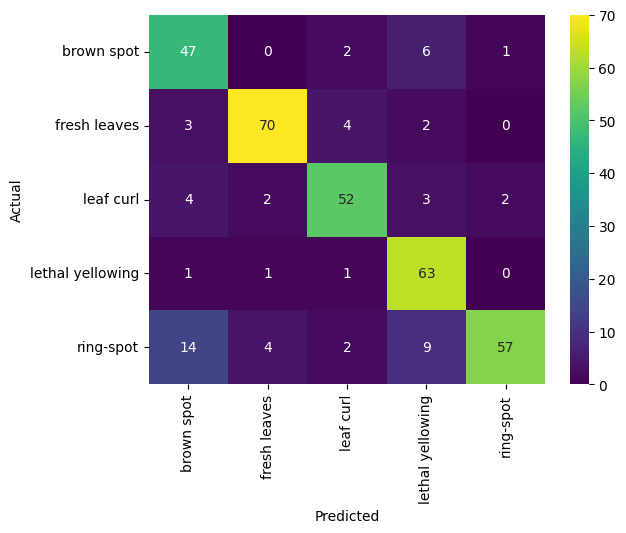

test accuracy : 82.57142857142857


In [ ]:
model = tf.keras.models.load_model("/content/drive/MyDrive/papaya-leaf-disease-dataset/papaya-leaf_resnet50.h5")
filenames = test_set.filenames
y_prob=[]
y_act=[]
test_set.reset()
for _ in range(nb_samples):
  X_test,Y_test = test_set.next()
  y_prob.append(model.predict(X_test))
  y_act.append(Y_test)

predicted_class = [list(training_set.class_indices.keys())[i.argmax()] for i in y_prob]
actual_class = [list(training_set.class_indices.keys())[i.argmax()] for i in y_act]


out_df = pd.DataFrame(np.vstack([predicted_class,actual_class]).T,columns=['predicted_class','actual_class'])
confusion_matrix = pd.crosstab(out_df['actual_class'],out_df['predicted_class'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix,cmap='viridis', annot=True,fmt='d')
plt.show()
print('test accuracy : {}'.format((np.diagonal(confusion_matrix).sum()/confusion_matrix.sum().sum()*100)))

In [ ]:
from sklearn.metrics import classification_report
class_label=list(test_set.class_indices.keys())
print(classification_report(actual_class, predicted_class,target_names=class_label))

                  precision    recall  f1-score   support

      brown spot       0.68      0.84      0.75        56
    fresh leaves       0.91      0.89      0.90        79
       leaf curl       0.85      0.83      0.84        63
lethal yellowing       0.76      0.95      0.85        66
       ring-spot       0.95      0.66      0.78        86

        accuracy                           0.83       350
       macro avg       0.83      0.83      0.82       350
    weighted avg       0.84      0.83      0.83       350



In [ ]:
import matplotlib.pyplot as plt

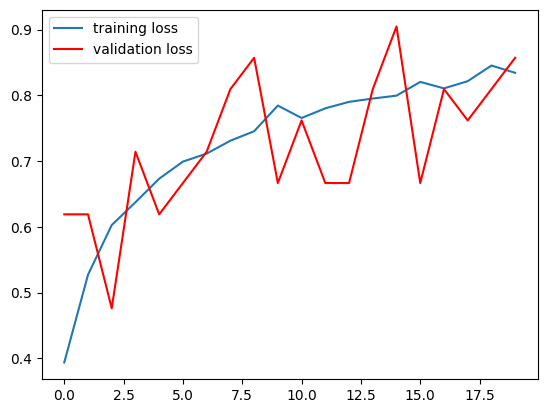

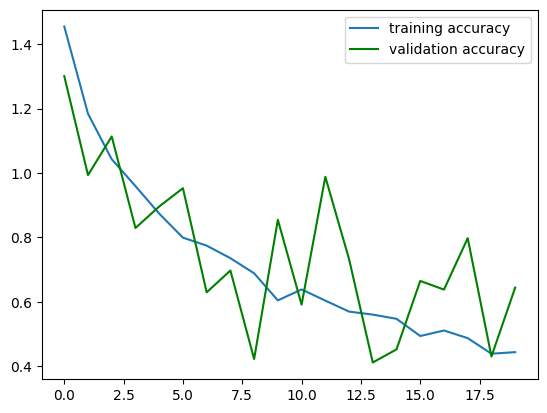

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot the accuracy
plt.plot(r.history['accuracy'], label='training loss')
plt.plot(r.history['val_accuracy'], label='validation loss', color='red')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

# Plot the loss
plt.plot(r.history['loss'], label='training accuracy')
plt.plot(r.history['val_loss'], label='validation accuracy', color='green')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')
